### 1. Dictionary

dictionary = {key: value}

In [1]:
import pandas as pd

In [2]:
이다민 = {"반":7, "번호":14, "성별":"F"}
이다민["반"], 이다민["번호"], 이다민["성별"]

(7, 14, 'F')

In [3]:
# dictionary 추가 삭제
이다민["이름"] = "이다민"
del 이다민["번호"]

이다민

{'반': 7, '성별': 'F', '이름': '이다민'}

In [4]:
이다민.keys()

dict_keys(['반', '성별', '이름'])

In [6]:
이다민.values()

dict_values([7, 'F', '이다민'])

In [7]:
이다민.items()

dict_items([('반', 7), ('성별', 'F'), ('이름', '이다민')])

In [8]:
for key, value in 이다민.items():
    print(key, value)

반 7
성별 F
이름 이다민


In [44]:
ATP = {7:["김준성"], 8:["홍수민"], 9:["백정원"], 10:["김여향", "조현지"], 11:["이비인", "이채원"], 12:["양주연"]}

In [46]:
for class_, name in ATP.items():
    print("{}반: {}".format(class_, name))

7반: ['김준성']
8반: ['홍수민']
9반: ['백정원']
10반: ['김여향', '조현지']
11반: ['이비인', '이채원']
12반: ['양주연']


### 2. Networkx

In [15]:
import networkx as nx

In [ ]:
G = nx.Graph()
# G = nx.DiGraph() # Directed network

In [ ]:
G.nodes(), G.edges()

In [ ]:
#### 노드 추가, 삭제, 확인

In [ ]:
members = ["김준성", "홍수민", "백정원", "김여향", "조현지", "이비인", "이채원", "양주연"]
G.add_node("이다민")
G.add_nodes_from(members)
G.nodes()

In [ ]:
G.remove_node("이다민")
G.remove_nodes_from([])


In [ ]:
G.add_edge("이비인", "이채원")
G.add_edges_from([])

# G.remove_edge()
G.remove_edges_from([])
G.edges()

In [ ]:
G.degree

In [ ]:
G.nodes["이비인"]["gender"] = "F"

In [ ]:
G.nodes(data=True)

In [ ]:
# 한글이 보이려면 폰트를 지정해줘야한다. 
nx.draw(G, with_labels=True, font_family='AppleGothic', font_size=20, font_weight="bold")

In [ ]:
degree = nx.degree(G)
betweenness = nx.betweenness_centrality(G)

In [ ]:
# nx.set_node_attributes(G, degree, "degree")
nx.set_node_attributes(G, betweenness, "betweenness")

G.nodes(data=True)


#### 복잡계 네트워크

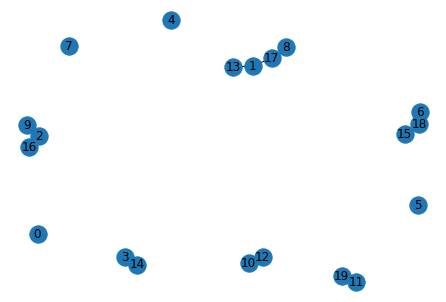

In [23]:
# 랜덤 그래프 
# 그래프 노드 수 : N , 연결 확률 : p 
N = 20
p = 0.1

ER = nx.erdos_renyi_graph(N, p)
# networkx.erdos_renyi_graph(20, 0.1)
nx.draw(ER, with_labels=True)

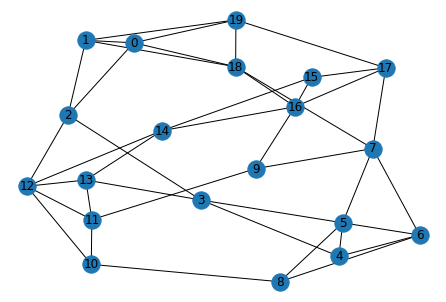

In [24]:
k = 4
WS = nx.watts_strogatz_graph(N, k, p)
nx.draw(WS, with_labels=True)

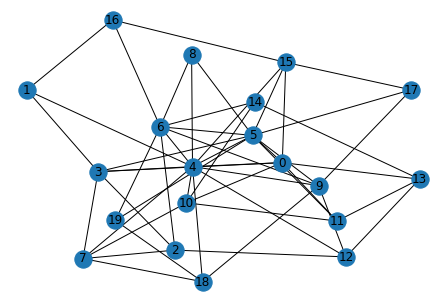

In [25]:
m = 3
BA = nx.barabasi_albert_graph(N, m)
nx.draw(BA, with_labels=True)

In [26]:
DC = nx.degree_centrality(WS)
BC = nx.betweenness_centrality(WS)
CC = nx.closeness_centrality(WS)
EC = nx.eigenvector_centrality(WS)

In [27]:
DC

{0: 0.21052631578947367,
 1: 0.21052631578947367,
 2: 0.21052631578947367,
 3: 0.21052631578947367,
 4: 0.15789473684210525,
 5: 0.2631578947368421,
 6: 0.21052631578947367,
 7: 0.2631578947368421,
 8: 0.15789473684210525,
 9: 0.15789473684210525,
 10: 0.15789473684210525,
 11: 0.21052631578947367,
 12: 0.2631578947368421,
 13: 0.21052631578947367,
 14: 0.21052631578947367,
 15: 0.15789473684210525,
 16: 0.2631578947368421,
 17: 0.21052631578947367,
 18: 0.2631578947368421,
 19: 0.21052631578947367}

In [34]:
node_size = [ v*v*10000 for v in DC.values()]

node_color = []
for value in DC.values():
    if value > 0.25:
        node_color.append("red")
    else:
        node_color.append("blue")

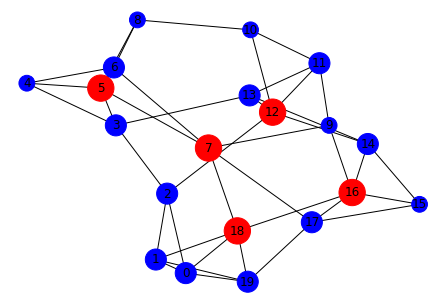

In [36]:
nx.draw(WS, node_size = node_size, node_color=node_color, with_labels=True)

#### 네트워크 저장

In [38]:
import matplotlib.pyplot as plt

plt.figure(figsize=(9,6))
plt.rcParams["figure.figsize"] = (9,6)

<Figure size 648x432 with 0 Axes>

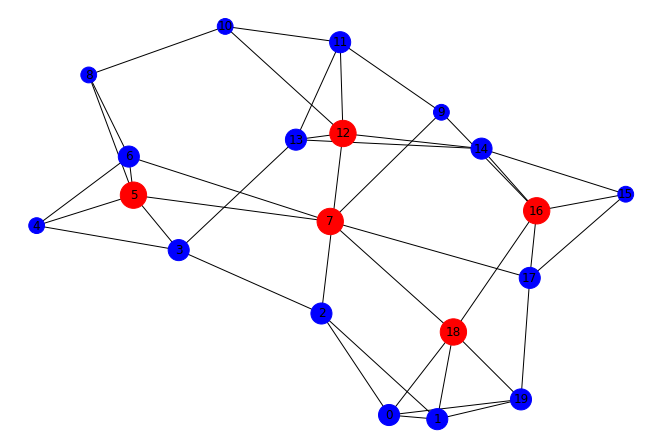

In [40]:
nx.draw(WS, node_size = node_size, node_color=node_color, with_labels=True)
plt.savefig("save_networkx.png", bbox_inches="tight")

### 3. Pandas

In [9]:
import pandas as pd

In [16]:
ATP_edges = pd.read_excel("../ATP_network.xlsx")
# ATP_edges = pd.read_csv("../ATP_network.csv")

In [19]:
graph = nx.from_pandas_edgelist(ATP_edges, "from", "to")

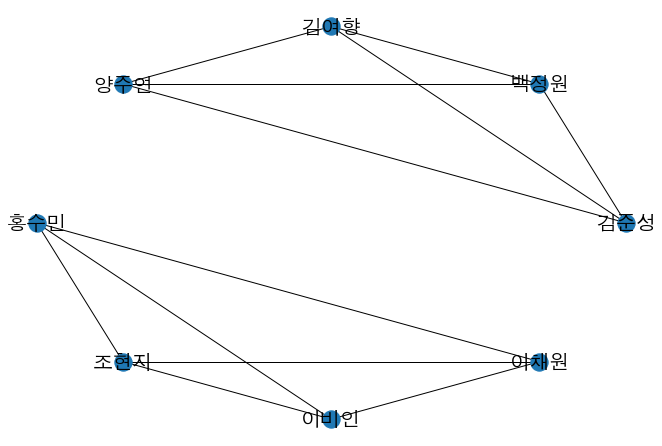

In [47]:
nx.draw_shell(graph, with_labels=True, font_family='AppleGothic', font_size=20)